<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Resources" data-toc-modified-id="Resources-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Resources</a></span></li><li><span><a href="#Python-setup" data-toc-modified-id="Python-setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Python setup</a></span></li><li><span><a href="#Example:-Market-Basket-Analysis-in-Movies" data-toc-modified-id="Example:-Market-Basket-Analysis-in-Movies-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Example: Market Basket Analysis in Movies</a></span><ul class="toc-item"><li><span><a href="#import-data" data-toc-modified-id="import-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>import data</a></span></li><li><span><a href="#one-hot-encode" data-toc-modified-id="one-hot-encode-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>one hot encode</a></span></li><li><span><a href="#Generate-the-Association-Rules-of-2-Items" data-toc-modified-id="Generate-the-Association-Rules-of-2-Items-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Generate the Association Rules of 2 Items</a></span></li><li><span><a href="#Extract-recommendations:-using-101-Dalmatians" data-toc-modified-id="Extract-recommendations:-using-101-Dalmatians-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Extract recommendations: using 101 Dalmatians</a></span></li></ul></li><li><span><a href="#Example-Market-Basket-Analysis-in-Grocery-Basket" data-toc-modified-id="Example-Market-Basket-Analysis-in-Grocery-Basket-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Example Market Basket Analysis in Grocery Basket</a></span><ul class="toc-item"><li><span><a href="#association-rules-of-3-items" data-toc-modified-id="association-rules-of-3-items-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>association rules of 3 items</a></span></li><li><span><a href="#Visualize-Market-Basket-Analysis" data-toc-modified-id="Visualize-Market-Basket-Analysis-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Visualize Market Basket Analysis</a></span></li></ul></li></ul></div>

# Resources

A Tutorial about market basket analysis

https://medium.com/swlh/a-tutorial-about-market-basket-analysis-in-python-predictive-hacks-497dc6e06b27

Another article 

https://pbpython.com/market-basket-analysis.html
    

# Python setup

In [29]:
# !jt -t onedork -fs 100 -nfs 115 -cellw 88% -T -N

In [25]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>")) # increases width of ipython cells

# Example: Market Basket Analysis in Movies
https://medium.com/swlh/a-tutorial-about-market-basket-analysis-in-python-predictive-hacks-497dc6e06b27

## import data

In [1]:
import pandas as pd
import numpy as np
columns = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('ml-100k/u.data', sep='\t', names=columns)
columns = ['item_id', 'movie title', 'release date', 'video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
          'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
          'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv('ml-100k/u.item', sep='|', names=columns, encoding='latin-1')
movie_names = movies[['item_id', 'movie title']]
combined_movies_data = pd.merge(df, movie_names, on='item_id')
combined_movies_data = combined_movies_data[['user_id','movie title']]
combined_movies_data.head()

,user_id,movie title
0,196,Kolya (1996)
1,63,Kolya (1996)
2,226,Kolya (1996)
3,154,Kolya (1996)
4,306,Kolya (1996)


In [4]:
print(combined_movies_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      100000 non-null  int64 
 1   movie title  100000 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.3+ MB
None


## one hot encode

Then we want to create a “Onehot” Data Frame, with True values when one movie has been watched by a User_ID and False otherwise.

In [ ]:
onehot = combined_movies_data.pivot_table(index='user_id', columns='movie title', aggfunc=len, fill_value=0)
onehot = onehot>0 # pivot table of binaries

In [5]:
print(onehot)

movie title  'Til There Was You (1997)  1-900 (1994)  101 Dalmatians (1996)  \
user_id                                                                       
1                                False         False                   True   
2                                False         False                  False   
3                                False         False                  False   
4                                False         False                  False   
5                                False         False                   True   
...                                ...           ...                    ...   
939                              False         False                  False   
940                              False         False                  False   
941                              False         False                  False   
942                              False         False                  False   
943                              False         False

## Generate the Association Rules of 2 Items
We will work with the mlxtend library and we will generate the Association Rules of 2 Items using the Apriori algorithm.

In [6]:
# !pip install mlxtend

In [7]:
from mlxtend.frequent_patterns import association_rules, apriori

# compute frequent items using the Apriori algorithm
frequent_itemsets = apriori(onehot, min_support = 0.001, max_len = 2, use_colnames=True)

# compute all association rules for frequent_itemsets
rules = association_rules(frequent_itemsets)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Brother's Kiss, A (1997))",('Til There Was You (1997)),0.001060,0.009544,0.001060,1.000000,104.777778,0.001050,inf
1,(Everest (1998)),('Til There Was You (1997)),0.002121,0.009544,0.002121,1.000000,104.777778,0.002101,inf
2,(MURDER and murder (1996)),('Til There Was You (1997)),0.001060,0.009544,0.001060,1.000000,104.777778,0.001050,inf
3,('Til There Was You (1997)),(My Best Friend's Wedding (1997)),0.009544,0.182397,0.008484,0.888889,4.873385,0.006743,7.358431
4,"(Next Step, The (1995))",('Til There Was You (1997)),0.001060,0.009544,0.001060,1.000000,104.777778,0.001050,inf


## Extract recommendations: using 101 Dalmatians

In [8]:
rules[rules.antecedents.apply(str).str.contains("101 Dalmatians")].sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
75,(101 Dalmatians (1996)),(Independence Day (ID4) (1996)),0.115589,0.454931,0.098621,0.853211,1.875473,0.046037,3.713282
96,(101 Dalmatians (1996)),(Toy Story (1995)),0.115589,0.479321,0.099682,0.862385,1.799180,0.044278,3.783598
88,(101 Dalmatians (1996)),(Return of the Jedi (1983)),0.115589,0.537646,0.093319,0.807339,1.501620,0.031173,2.399838
91,(101 Dalmatians (1996)),(Star Wars (1977)),0.115589,0.618240,0.100742,0.871560,1.409744,0.029281,2.972277


In [10]:
# sort rules by descending lift
rules.sort_values('lift', ascending=False).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
79594,(Shadows (Cienie) (1988)),(Quartier Mozart (1992)),0.00106,0.00106,0.00106,1.0,943.0,0.001059,inf
58781,"(I, Worst of All (Yo, la peor de todas) (1990))",(Shadows (Cienie) (1988)),0.00106,0.00106,0.00106,1.0,943.0,0.001059,inf
79038,"(Promise, The (Versprechen, Das) (1994))",(Touki Bouki (Journey of the Hyena) (1973)),0.00106,0.00106,0.00106,1.0,943.0,0.001059,inf
11935,(Lashou shentan (1992)),(Baton Rouge (1988)),0.00106,0.00106,0.00106,1.0,943.0,0.001059,inf
11936,(Baton Rouge (1988)),(Lashou shentan (1992)),0.00106,0.00106,0.00106,1.0,943.0,0.001059,inf


# Example Market Basket Analysis in Grocery Basket

In [15]:
groceries = pd.read_csv("groceries.txt", sep="\t")  #pd.read_csv("groceries.txt", sep=";") 
groceries

,ID,Transaction
0,0,"milk,bread,biscuit"
1,1,"bread,milk,biscuit,cereal"
2,2,"bread,tea"
3,3,"jam,bread,milk"
4,4,"tea,biscuit"
5,5,"bread,tea"
6,6,"tea,cereal"
7,7,"bread,tea,biscuit"
8,8,"jam,bread,tea"
9,9,"bread,milk"


## association rules of 3 items

In [17]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import association_rules, apriori
from mlxtend.preprocessing import TransactionEncoder
# get all the transcactions as a list
transcactions = list(groceries['Transaction'].apply(lambda x: sorted(x.split(','))))
# instantiate transcation encoder
encoder = TransactionEncoder().fit(transcactions)
onehot = encoder.transform(transcactions)
# convert one-hot encode data to DataFrame
onehot = pd.DataFrame(onehot, columns=encoder.columns_)
# compute frequent items using the Apriori algorithm - Get up to three items
frequent_itemsets = apriori(onehot, min_support = 0.001, max_len = 3, use_colnames=True)
# compute all association rules for frequent_itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [18]:
rules['lhs items'] = rules['antecedents'].apply(lambda x:len(x) )
rules[rules['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
60,"(biscuit, coffee)",(orange),0.10,0.15,0.10,1.000000,6.666667,0.0850,inf,2
54,"(cereal, biscuit)",(orange),0.15,0.15,0.10,0.666667,4.444444,0.0775,2.55,2
64,"(bread, cereal)",(milk),0.05,0.25,0.05,1.000000,4.000000,0.0375,inf,2
111,"(tea, coffee)",(milk),0.05,0.25,0.05,1.000000,4.000000,0.0375,inf,2
94,"(cereal, coffee)",(orange),0.20,0.15,0.10,0.500000,3.333333,0.0700,1.70,2


## Visualize Market Basket Analysis

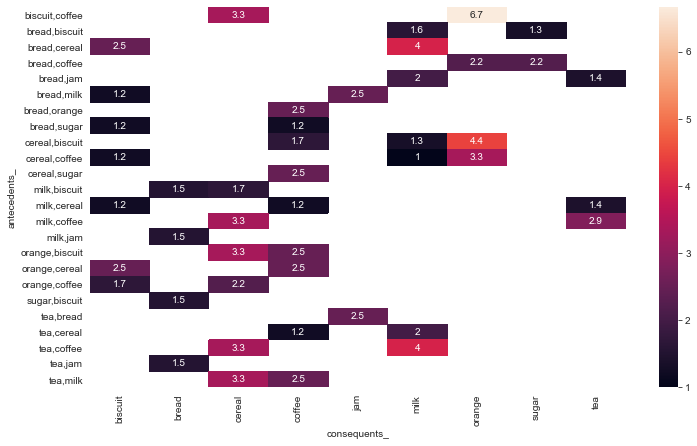

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')
plt.figure(figsize=(12,7))

# Replace frozen sets with strings
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules[rules['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')
# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()